In [1]:
import os
import gc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ebnsemble import RandomForestRegressor
import warnings; warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'sklearn'

In [8]:
! pip install scikit-learn

     ---------------------------------------- 8.4/8.4 MB 10.9 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.3 MB/s eta 0:00:00


In [10]:
import  sklearn

In [5]:
pip install pandas 

In [1]:
import os
import gc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import warnings; warnings.filterwarnings("ignore")

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import gc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings("ignore")

In [32]:
## Import
#folder_path = 'C:\Users\amibe\OneDrive\Bureau\Data science en pratique\Cours 1\cours-1-data (2).zip'
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head

<bound method NDFrame.head of        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0       1          60         65.0     8450            7            5   
1       2          20         80.0     9600            6            8   
2       3          60         68.0    11250            7            5   
3       4          70         60.0     9550            7            5   
4       5          60         84.0    14260            8            5   
..    ...         ...          ...      ...          ...          ...   
995   996          50         51.0     4712            4            7   
996   997          20          NaN    10659            5            6   
997   998          20          NaN    11717            6            6   
998   999          30         60.0     9786            3            4   
999  1000          20         64.0     6762            7            5   

     YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0         2003      

In [6]:
# Satistique des données
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1000.000000,1000.000000,827.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,994.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,56.880000,69.95526,10691.176000,6.125000,5.587000,1971.633000,1985.279000,109.225352,445.214000,...,97.353000,47.669000,21.413000,3.703000,15.055000,1.160000,45.384000,6.307000,2007.830000,182284.451000
std,288.819436,42.256375,23.20269,11412.668294,1.383217,1.108901,30.007945,20.412296,188.885856,442.394927,...,124.392314,67.988557,60.696528,30.915733,55.467744,26.103329,525.449337,2.691095,1.326974,80291.215207
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,250.750000,20.000000,60.00000,7585.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,500.500000,50.000000,70.00000,9451.000000,6.000000,5.000000,1974.000000,1994.000000,0.000000,384.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,750.250000,70.000000,80.00000,11628.500000,7.000000,6.000000,2000.250000,2004.000000,174.750000,725.000000,...,171.250000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1000.000000,190.000000,313.00000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


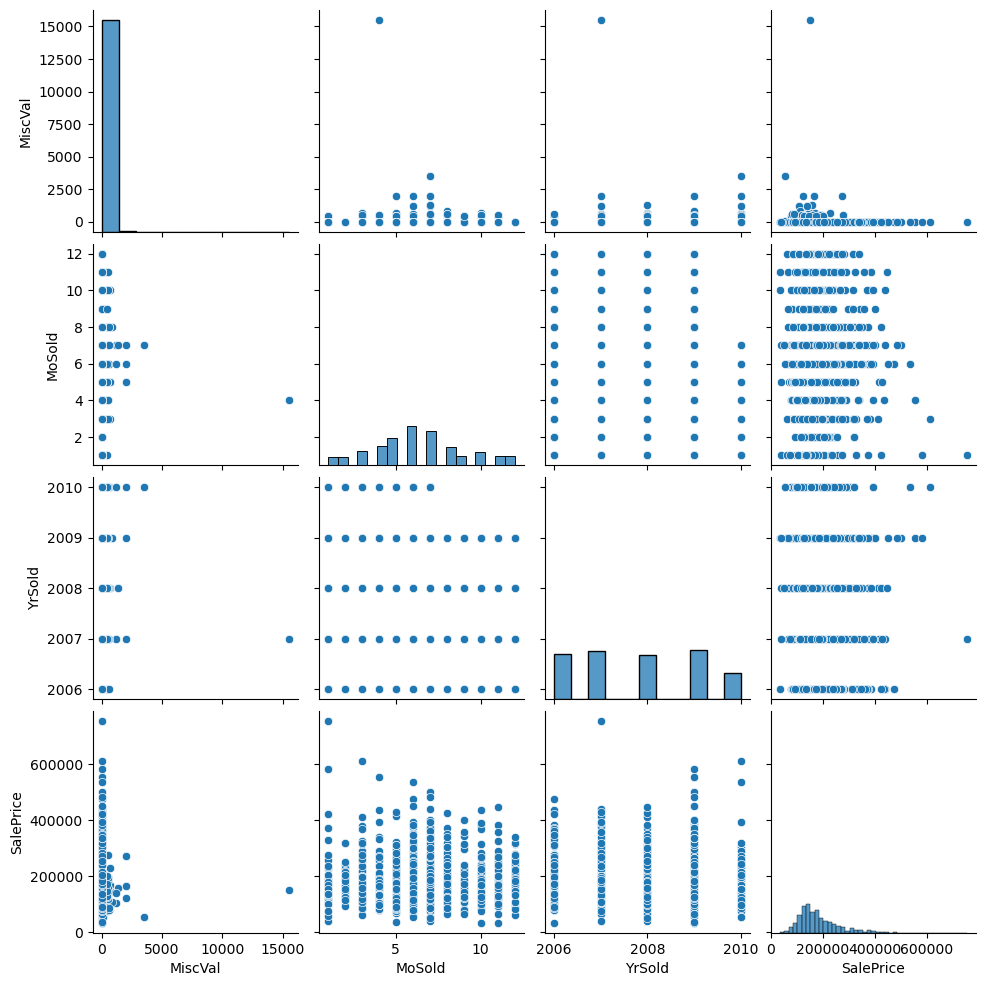

In [7]:

sns.pairplot(train.iloc[:,34:38])

<AxesSubplot: xlabel='MiscVal', ylabel='SalePrice'>

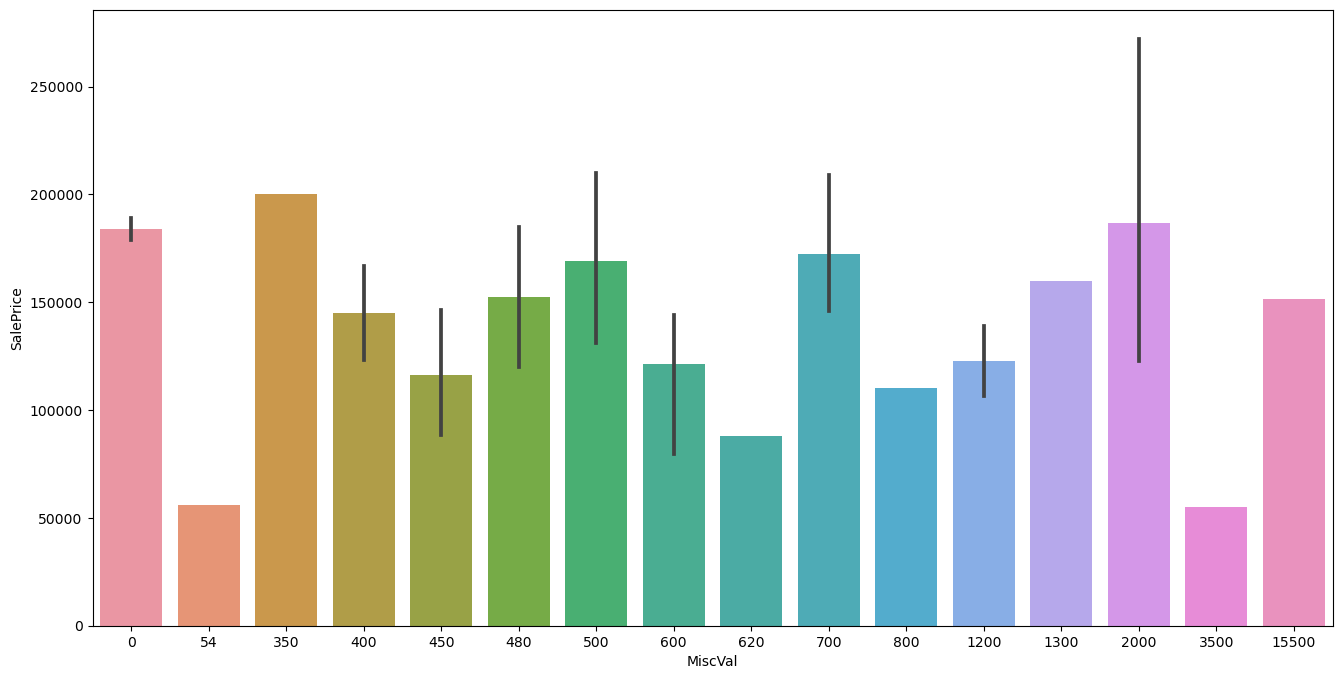

In [8]:

fig, axes = plt.subplots(1, 1, figsize=(16, 8))
sns.barplot(x=train['MiscVal'], y=train['SalePrice'])

In [43]:
# la variable cible
y_train= train['SalePrice']
y_test = test['SalePrice']
train = train.drop(['SalePrice','Id'], axis=1)
test =  test.drop(['SalePrice','Id'], axis=1)

In [44]:
# Valeurs manquantes
def compute_missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    print (missing_data[(percent>0)],'\n' )
    return missing_data[(percent>0)].index.tolist()

In [45]:
compute_missing_values(train)
compute_missing_values(test)


             Total  Pourcentage
LotFrontage    173        0.173
GarageYrBlt     56        0.056
MasVnrArea       6        0.006 

             Total  Pourcentage
LotFrontage     86     0.186957
GarageYrBlt     25     0.054348
MasVnrArea       2     0.004348 



['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [46]:
train['LotFrontage']
train['GarageYrBlt']
train['MasVnrArea']

0      196.0
1        0.0
2      162.0
3        0.0
4      350.0
       ...  
995      0.0
996      0.0
997    571.0
998      0.0
999     24.0
Name: MasVnrArea, Length: 1000, dtype: float64

In [47]:
#Complèter les valeurs manquantes
median= train['LotFrontage'].median()
train['LotFrontage'].fillna(median, inplace=True)
mean=train['GarageYrBlt'].mean()
train['GarageYrBlt'].fillna(mean, inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)
median= train['LotFrontage'].median()
test['LotFrontage'].fillna(median, inplace=True)
mean=test['GarageYrBlt'].mean()
test['GarageYrBlt'].fillna(mean, inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)

In [61]:
#Verification
compute_missing_values(train)
compute_missing_values(test)

Empty DataFrame
Columns: [Total, Pourcentage]
Index: [] 

Empty DataFrame
Columns: [Total, Pourcentage]
Index: [] 



[]

In [49]:
print(f"Train data has {train.isna().sum().sum()} NAs")
print(f"Test data has {test.isna().sum().sum()} NAs")

Train data has 0 NAs
Test data has 0 NAs


Text(0.5, 1.0, 'Distribution of SalePrice')

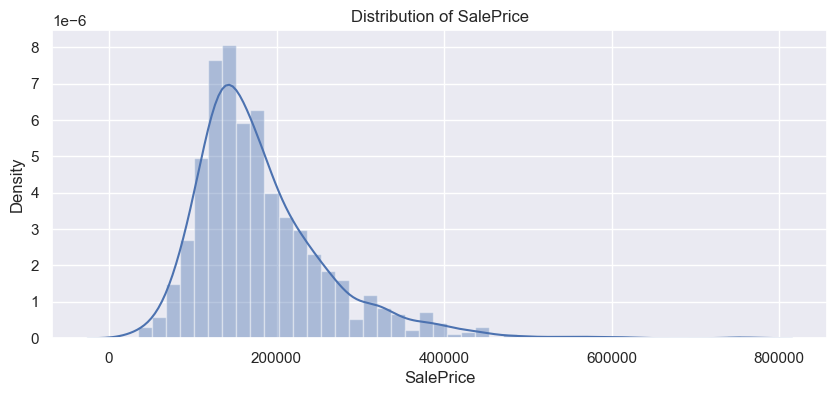

In [50]:
plt.figure(figsize=(10,4))
sns.distplot(y_train)
plt.title('Distribution of SalePrice')

 On remarque que les données de la variable cible sont distribuées selon une loi normale

Text(0.5, 1.0, 'Distribution of Box-Cox Transformation of SalePrice')

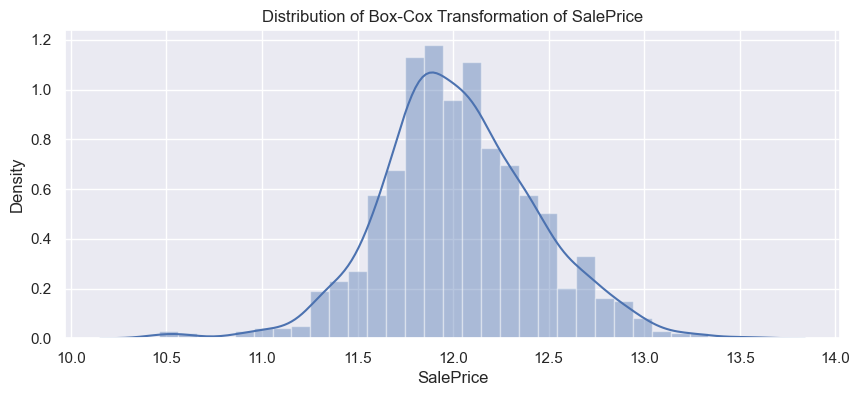

In [51]:
#On remarque que SalePrice a un profil de log-normal, ne peut-on pas le transformer?
plt.figure(figsize=(10,4))
sns.distplot(np.log(y_train)); # Le passage au log permet parfois lors de l'apprentissage d'améliorer l'erreur
plt.title('Distribution of Box-Cox Transformation of SalePrice')

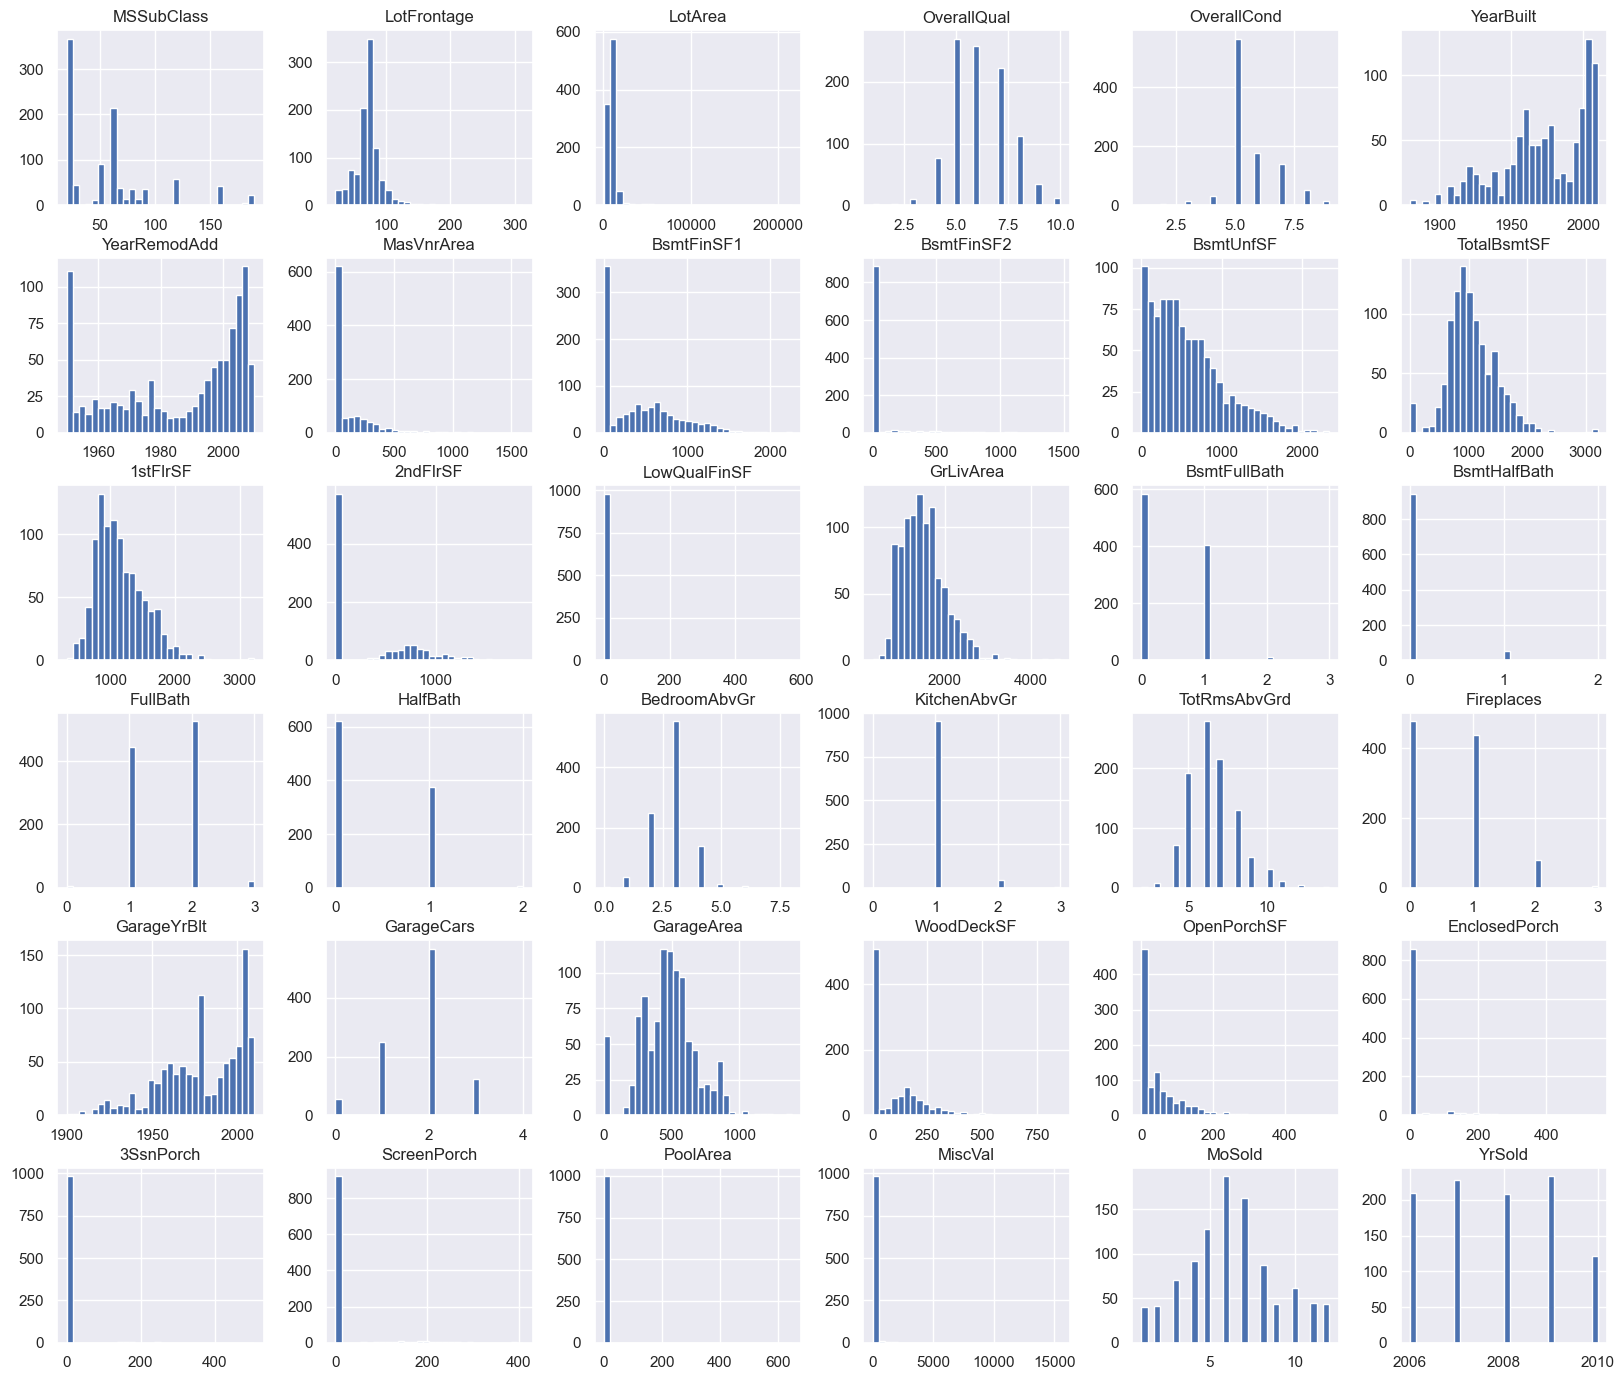

In [52]:
#Une façon de tout visualiser grâce à pandas
train.hist(figsize=(20, 20), bins=30, layout=(7, 6));

In [53]:
train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

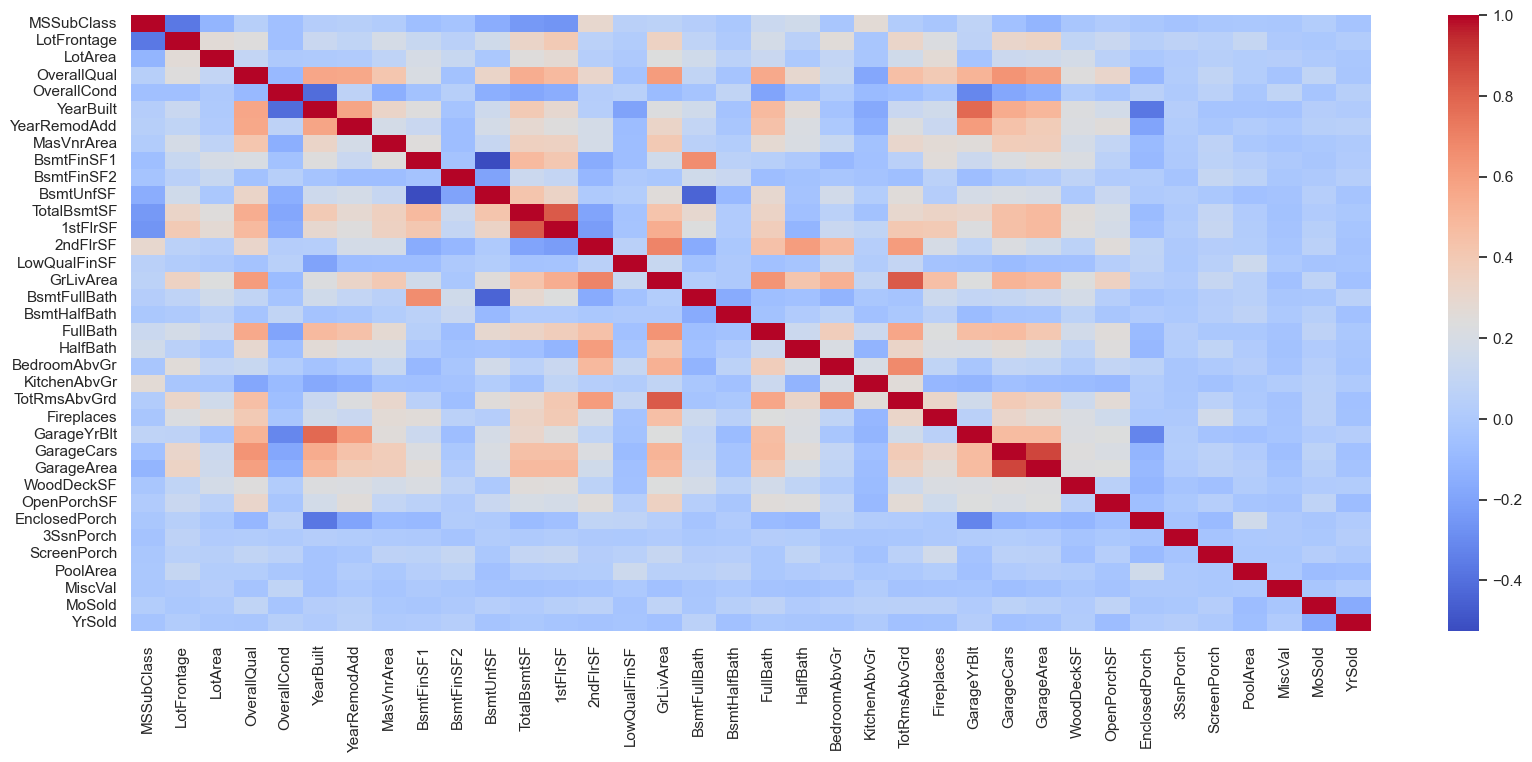

In [54]:
sns.set(rc={'figure.figsize':(20,8)})

df_corr = train.corr()

ax = sns.heatmap(df_corr, xticklabels = df_corr.columns , 
                 yticklabels = df_corr.columns, cmap = 'coolwarm')

In [55]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [117]:

reg = RandomForestRegressor(n_estimators=100)
reg.fit(train, y_train)

RandomForestRegressor()

Feature: 0, Score: 0.00262
Feature: 1, Score: 0.00737
Feature: 2, Score: 0.02125
Feature: 3, Score: 0.57404
Feature: 4, Score: 0.00529
Feature: 5, Score: 0.01586
Feature: 6, Score: 0.01027
Feature: 7, Score: 0.00739
Feature: 8, Score: 0.03338
Feature: 9, Score: 0.00097
Feature: 10, Score: 0.00643
Feature: 11, Score: 0.03986
Feature: 12, Score: 0.03876
Feature: 13, Score: 0.01085
Feature: 14, Score: 0.00019
Feature: 15, Score: 0.12692
Feature: 16, Score: 0.00091
Feature: 17, Score: 0.00249
Feature: 18, Score: 0.00412
Feature: 19, Score: 0.00116
Feature: 20, Score: 0.00189
Feature: 21, Score: 0.00139
Feature: 22, Score: 0.00818
Feature: 23, Score: 0.00391
Feature: 24, Score: 0.00732
Feature: 25, Score: 0.01630
Feature: 26, Score: 0.02045
Feature: 27, Score: 0.00722
Feature: 28, Score: 0.00810
Feature: 29, Score: 0.00083
Feature: 30, Score: 0.00012
Feature: 31, Score: 0.00242
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00012
Feature: 34, Score: 0.00892
Feature: 35, Score: 0.00268


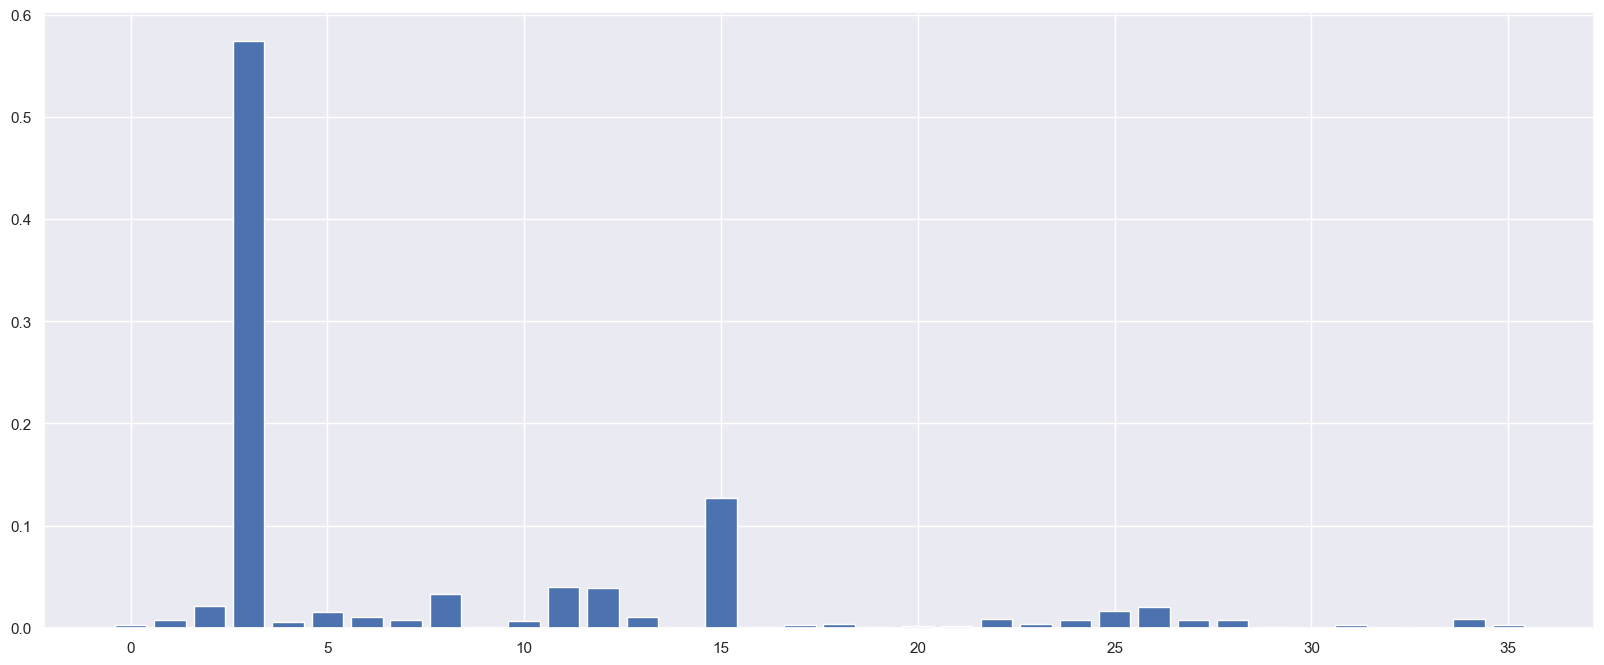

In [57]:
# get importance
importance = reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [59]:

# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
yhat = reg.predict(test)
# evaluate predictions
yhat


array([ 91462.02,  91877.68, 249342.68, 145741.34, 194742.72, 136603.66,
       164296.48,  91293.  , 229548.36, 121169.28, 120383.  , 122872.14,
       130136.58, 108084.3 , 134594.6 , 240425.4 , 216776.8 , 263881.66,
       172580.9 , 200314.4 , 154759.5 , 193027.3 , 113882.32, 194229.3 ,
       376316.16, 118618.86, 153573.74, 287540.06, 127447.  , 121776.  ,
       142192.62, 235789.88, 329742.22, 233705.84, 111479.92,  94758.58,
       292342.64, 267206.2 , 100646.  ,  83718.22, 163937.92, 165127.  ,
       179017.4 , 277453.76, 363476.38, 146667.92, 420727.36, 142630.74,
       150882.44, 100703.58, 176780.12, 179038.84, 175509.  , 156376.  ,
       283137.2 , 170821.  , 201073.7 , 224060.74, 352085.52, 177469.  ,
       235153.22, 106232.84, 145408.76, 115440.44, 157155.  , 249886.  ,
       165851.4 , 175640.  , 194426.  , 126177.  , 132853.  , 160205.  ,
       116873.16, 161966.48, 193040.98, 189280.3 , 166596.  , 150193.  ,
       141150.  , 136446.5 , 165402.8 , 129146.66, 

In [83]:
from sklearn.metrics import r2_score
score = r2_score(y_test, yhat)
print("The accuracy of our model is {}%".format(round(score, 2) *100))


The accuracy of our model is 79.0%


In [87]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, yhat)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 19901.98


In [88]:

score = np.sqrt(mean_absolute_error(y_test, yhat))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 141.07


In [119]:
# configure to select a subset of features
from sklearn.feature_selection import SelectFromModel
fs = SelectFromModel(reg, max_features=6)
fs.fit(train, y_train)

SelectFromModel(estimator=RandomForestRegressor(), max_features=6)

In [120]:

 # transform train input data
 X_train_fs = fs.transform(train)
 # transform test input data
 X_test_fs = fs.transform(test)
reg.fit(X_train_fs, y_train)

RandomForestRegressor()

In [123]:
# evaluate the model
yhat = reg.predict(X_test_fs)

In [124]:
score = r2_score(y_test, yhat)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 81.0%


In [126]:
from sklearn.model_selection import train_test_split
X_tr, X_va, y_tr, y_va = train_test_split(train,y_train, random_state = 1234 , test_size = 0.2) 
# On sépare aléatoirement en 8/2, la seed (random_state) permet la reproductibilité des résultats

In [128]:
reg.fit(X_tr,y_tr)

RandomForestRegressor()

In [144]:
predictions = reg.predict(X_va)

In [145]:
from sklearn.metrics import r2_score
score = r2_score(y_va, predictions)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 87.0%


In [146]:
predictions = reg.predict(test) #On prédit le jeu de test

In [147]:
core = r2_score(y_test, predictions)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 87.0%
